<a href="https://colab.research.google.com/github/rahul-tc/Data-Analysis-Project/blob/main/Rahul_KyleInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
product_return = pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/ComplaintsTable.csv")
product_return
product_return.head()

,ComplaintID,ProductCategory,ComplaintReason,UnitsSold,SalesValue,ComplaintCount
0,37678,Kitchenware,Missing Item,2,27905,1
1,37679,Bedding,Poor Quality,2,26372,1
2,37680,Jewelry,Damage on Delivery,3,47014,1
3,37681,Books,Damage on Delivery,1,30035,1
4,37682,Beauty Products,Wrong Size,7,42430,1


In [3]:
total_complaints = product_return.groupby("ProductCategory")["ComplaintCount"].sum()
total_complaints

,ComplaintCount
ProductCategory,
Beauty Products,406
Bedding,926
Books,484
Clothing,160
Electronics,237
Footwear,226
Furniture,213
Garden Tools,88
Groceries,312


In [4]:
sorted_complaints = total_complaints.sort_values(ascending=False)
sorted_complaints

,ComplaintCount
ProductCategory,
Kitchenware,1071
Bedding,926
Jewelry,505
Books,484
Stationery,433
Beauty Products,406
Home Appliances,340
Groceries,312
Electronics,237


In [5]:
cumulative_sum = sorted_complaints.cumsum()
cumulative_sum

,ComplaintCount
ProductCategory,
Kitchenware,1071
Bedding,1997
Jewelry,2502
Books,2986
Stationery,3419
Beauty Products,3825
Home Appliances,4165
Groceries,4477
Electronics,4714


In [6]:
cumulative_percentage = round(cumulative_sum/sorted_complaints.sum()*100,2)
cumulative_percentage

,ComplaintCount
ProductCategory,
Kitchenware,19.23
Bedding,35.85
Jewelry,44.92
Books,53.61
Stationery,61.38
Beauty Products,68.67
Home Appliances,74.78
Groceries,80.38
Electronics,84.63


Text(0.5, 1.0, 'Pareto Analysis of Product Complaints')

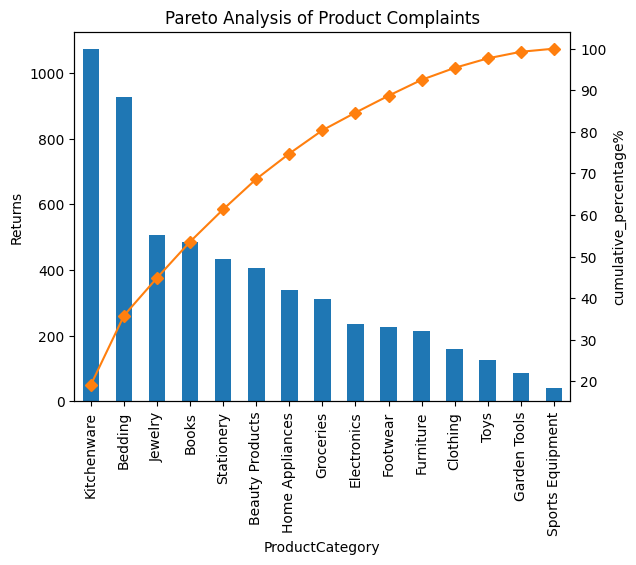

In [7]:
fig, ax1 = plt.subplots()
sorted_complaints.plot(kind='bar',color='C0',ax = ax1)
ax1.set_ylabel('Returns')
ax2 = ax1.twinx()
cumulative_percentage.plot(kind='line',color='C1',ax=ax2,marker='D')
ax2.set_ylabel('cumulative_percentage%')
plt.title('Pareto Analysis of Product Complaints')

In [8]:
product_return.head()

,ComplaintID,ProductCategory,ComplaintReason,UnitsSold,SalesValue,ComplaintCount
0,37678,Kitchenware,Missing Item,2,27905,1
1,37679,Bedding,Poor Quality,2,26372,1
2,37680,Jewelry,Damage on Delivery,3,47014,1
3,37681,Books,Damage on Delivery,1,30035,1
4,37682,Beauty Products,Wrong Size,7,42430,1


In [9]:
Top4 = product_return.query('ProductCategory in["Kitchenware","Bedding","Jewelry","Books","Beauty Products"]')
Top4


,ComplaintID,ProductCategory,ComplaintReason,UnitsSold,SalesValue,ComplaintCount
0,37678,Kitchenware,Missing Item,2,27905,1
1,37679,Bedding,Poor Quality,2,26372,1
2,37680,Jewelry,Damage on Delivery,3,47014,1
3,37681,Books,Damage on Delivery,1,30035,1
4,37682,Beauty Products,Wrong Size,7,42430,1
...,...,...,...,...,...,...
5558,41924,Kitchenware,Damage on Delivery,7,45605,1
5559,41925,Jewelry,Missing Item,2,47429,1
5560,41926,Kitchenware,Late Delivery,8,48863,1
5562,41928,Kitchenware,Wrong Size,2,47429,1


In [19]:
sorted_returns1 = Top4.groupby("ComplaintReason")["ComplaintCount"].sum().sort_values(ascending=False)
sorted_returns1

,ComplaintCount
ComplaintReason,
Missing Item,882
Poor Quality,783
Damage on Delivery,463
Wrong Size,373
Defective Item,303
Incorrect Item Sent,229
Late Delivery,160
Packaging Issues,130
Product Not As Described,69


In [31]:
cumulative_reason_percentage = round(sorted_returns1.cumsum()/sorted_returns1.sum()*100,2)
cumulative_reason_percentage

,ComplaintCount
ComplaintReason,
Missing Item,26.00
Poor Quality,49.09
Damage on Delivery,62.74
Wrong Size,73.73
Defective Item,82.67
Incorrect Item Sent,89.42
Late Delivery,94.13
Packaging Issues,97.97
Product Not As Described,100.00


Text(0.5, 1.0, 'Pareto Analysis of the reasons associated with returns')

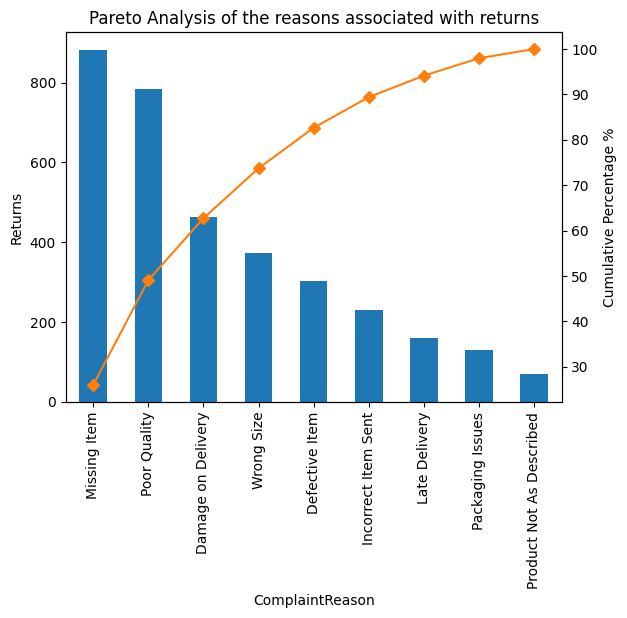

In [33]:
fig,ax1 = plt.subplots()
sorted_returns1.plot(kind='bar',color='C0',ax=ax1)
ax1.set_ylabel('Returns')
ax2 = ax1.twinx()
cumulative_reason_percentage.plot(kind='line',color='C1',ax = ax2,marker ='D')
ax2.set_ylabel('Cumulative Percentage %')
plt.title('Pareto Analysis of the reasons associated with returns')